In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def correccion_cromaticas(imagen, correccion):
    # Dividir la imagen en sus canales de color
    b, g, r = cv2.split(imagen)

    # Aplicar la corrección por coordenadas cromáticas a cada canal
    b_corregido = np.power(b / 255.0, correccion[0]) * 255.0
    g_corregido = np.power(g / 255.0, correccion[1]) * 255.0
    r_corregido = np.power(r / 255.0, correccion[2]) * 255.0

    # Combinar los canales corregidos
    imagen_corregida = cv2.merge((b_corregido, g_corregido, r_corregido))

    # Convertir la imagen corregida a RGB para mostrarla correctamente con Matplotlib
    imagen_corregida_rgb = cv2.cvtColor(imagen_corregida.astype(np.uint8), cv2.COLOR_BGR2RGB)

    return imagen_corregida_rgb



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path_image="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/coord_cromaticas/CoordCrom_2.png"

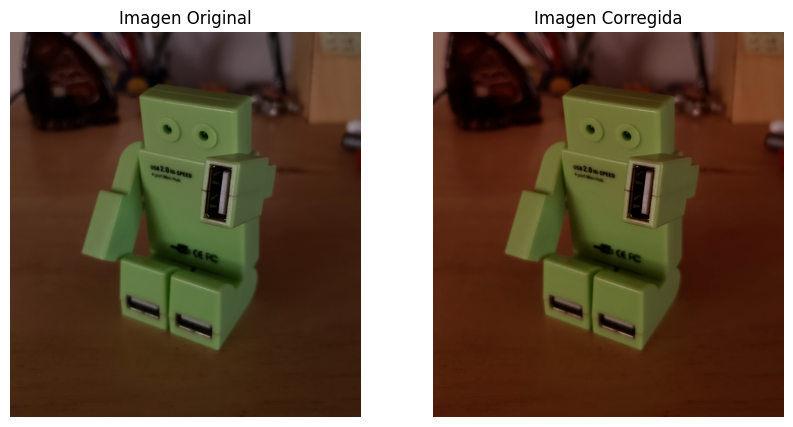

In [9]:
# Cargar la imagen
imagen_original = cv2.imread(path_image)

# Definir los valores de corrección por coordenadas cromáticas (gamma para cada canal)
correccion = [1.2, 1.1, 0.9]

# Aplicar la corrección por coordenadas cromáticas
imagen_corregida = correccion_cromaticas(imagen_original, correccion)

# Mostrar la imagen original y la imagen corregida utilizando Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')
axes[1].imshow(imagen_corregida)
axes[1].set_title('Imagen Corregida')
axes[1].axis('off')
plt.show()

In [10]:
def white_patch_correction(imagen):
    # Obtener el valor máximo de los canales de color
    max_valor = np.max(imagen, axis=(0, 1))

    # Dividir cada canal de color por el valor máximo correspondiente
    imagen_corregida = imagen / max_valor

    # Asegurarse de que los valores estén en el rango [0, 255]
    imagen_corregida = np.clip(imagen_corregida * 255, 0, 255).astype(np.uint8)

    return imagen_corregida



In [12]:
path_image2="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/coord_cromaticas/CoordCrom_3.png"

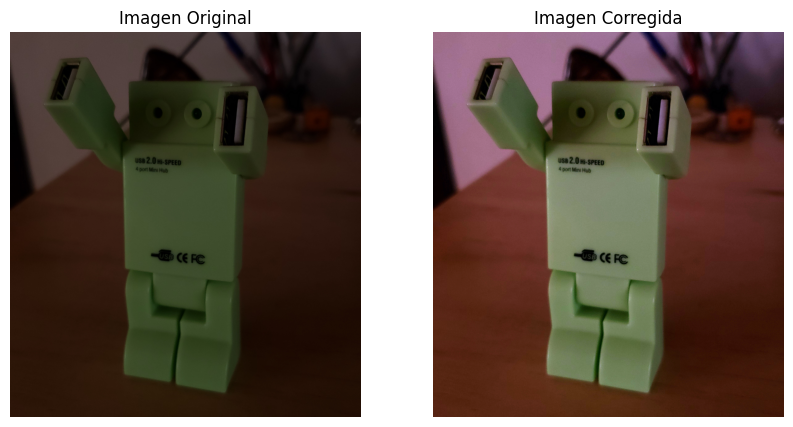

In [13]:
# Cargar la imagen
imagen_original = cv2.imread(path_image2)

# Aplicar la corrección White Patch
imagen_corregida = white_patch_correction(imagen_original)

# Mostrar la imagen original y la imagen corregida utilizando Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(imagen_corregida, cv2.COLOR_BGR2RGB))
axes[1].set_title('Imagen Corregida')
axes[1].axis('off')
plt.show()
